# PHY4000W CP Tutorial 5 - PLLVIN013 (Vineshree Pillay)
## Question 1

In [55]:
import matplotlib.pyplot as plt
from random import random
import numpy as np
from scipy.spatial.distance import cdist
import scipy
import pandas as pd 
import timeit
from scipy.special import gamma
import json

### a) The convergence of a Monte Carlo procedure is related to the square root of the number of iterations
Monte Carlo simulation where the red line denotes the actual volume for dim = 3,4,5,6,7,8,9,10

In [56]:
dimensions = [3, 4, 5, 6, 7, 8, 9, 10]
labels = ["3d", "4d", "5d", "6d", "7d", "8d", "9d", "10d"]

def n_dim_vol(n_dim, radius = 1):
    return ((np.pi**(n_dim/2)/gamma(n_dim/ 2+1))*radius**n_dim)

def n_dim_cube(n_dim, radius = 1):
    return (2*radius)**n_dim

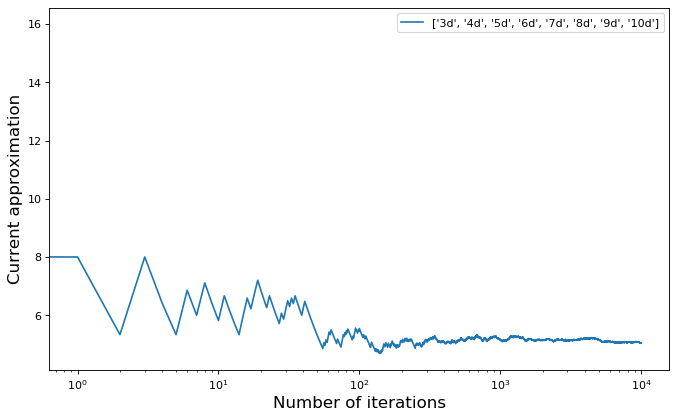

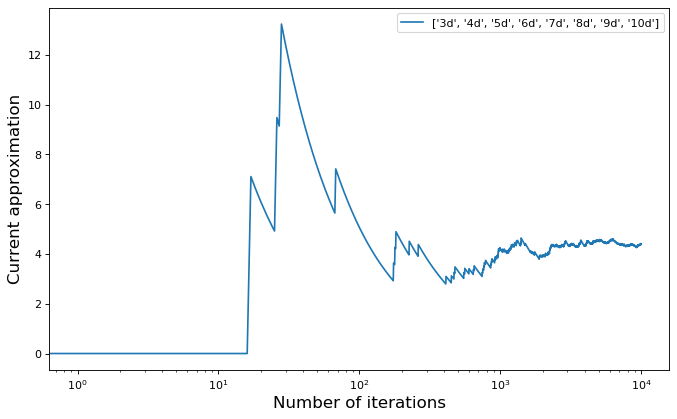

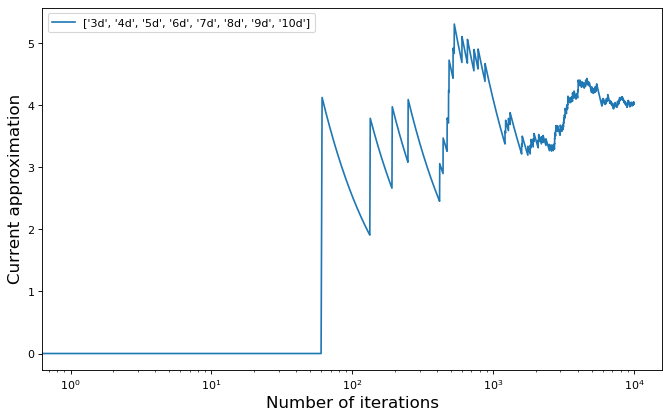

In [57]:
N = 10000
for k in dimensions: 
    inside = 0
    approximation = np.empty(N)
    vol = n_dim_vol(k, radius=1)
    cube = n_dim_cube(k, radius=1)
    for i in range(N):
        spatial_coordinates = []
        for j in range(k):
            xj = np.random.uniform(-1, 1)
            spatial_coordinates.append(xj)
        if np.sqrt(np.sum(np.square(spatial_coordinates))) < 1:
            inside += 1.0
        p_approximation = inside/float(i+1)
        approximation[i] = cube*p_approximation

    plt.figure(figsize=(10,6), dpi=80)
       
    plt.semilogx(approximation, label = labels)
    plt.xlabel("Number of iterations", fontsize = 15)
    plt.ylabel("Current approximation", fontsize = 15)
    plt.legend()
    # plot the exact value of the volume in red
    #plt.axhline(4/3*(np.pi), color="r", alpha=0.5 ) #for n=3 only
    plt.show()

From this plot we can see that the convergence of the integration tends to the literature value for each number of iterations. For the 3 dimensional system the literature value for the volume is given by the formula $V = \frac{4}{3}\pi r^{3} = \frac{4}{3}\pi = 4.189 m^3$ given by the line in red.

### b) Uncertainty for 10000 samples with uncertainty error and compared to the literature value

In [58]:
N_max = 10
M = 10000
dims = np.zeros(N_max)
volume = np.zeros(N_max)
for N in range(1,N_max+1):
    y = np.random.uniform(low=-1, high=1,size=(M,N))
    dist = cdist(y,np.expand_dims(np.zeros(N),0),metric='euclidean')
    p = np.sum(dist < 1)/M
    dims[N-1] = N
    volume[N-1] = p
df=pd.DataFrame(data={'dimensions': dims,'Probability of a point in hypersphere': volume})
print(df)

   dimensions  Probability of a point in hypersphere
0         1.0                                 1.0000
1         2.0                                 0.7835
2         3.0                                 0.5264
3         4.0                                 0.3107
4         5.0                                 0.1612
5         6.0                                 0.0779
6         7.0                                 0.0345
7         8.0                                 0.0154
8         9.0                                 0.0063
9        10.0                                 0.0022


### Comparing the runtime as we move to higher dimensions for a hypersphere - first testing this out for a 10 dimensional sphere to check whether we are getting similar literature values
To make life a bit easier, defining instead the n-dimensional function for a hypersphere

In [59]:
def samples(n_samples, n_dim):
    return np.random.uniform(low = -1.0, high=np.nextafter(1.0,2.0), size = (n_samples, n_dim))
def n_dim_vol(n_dim, radius = 1):
    return ((np.pi**(n_dim/2)/gamma(n_dim/ 2+1))*radius**n_dim)

In [60]:
np.random.seed(seed = 42)
n_dim = 10
n_samples = 10000

N_samples = samples(n_samples, n_dim)
within_sphere = [np.sum(s**2) <= 1.0 for s in N_samples]
fraction = np.sum(within_sphere)/n_samples

In [61]:
est_vol = 2**n_dim*fraction
print("Estimated volume of a 10 dimensional sphere = ", est_vol)

Estimated volume of a 10 dimensional sphere =  2.56


Comparing this to a literature value of:

In [62]:
lit_vol = n_dim_vol(n_dim)
uncert = np.abs(est_vol-lit_vol)/lit_vol*100
print("Literature value of a 10 dim sphere = ", lit_vol)
print("Uncertainty between the estimated volume and literature result for a 10 dim sphere = ", uncert)

Literature value of a 10 dim sphere =  2.550164039877345
Uncertainty between the estimated volume and literature result for a 10 dim sphere =  0.38569911460001816


### For n-dimensions we can just include this in a for loop:

In [63]:
NN = 10000
hypersphere_volumes = []
hypersphere_uncertainties = []
times = []
dimensions = [3,4,5,6,7,8,9,10]
for k in dimensions: 
    start_time = timeit.default_timer()
    vol = n_dim_vol(k, radius=1)
    cube = n_dim_cube(k, radius=1)
    spatial_coordinates = []
    for j in range(k):
        xj = np.random.uniform(-1, 1, NN)
        spatial_coordinates.append(xj)

    spatial_coordinates = np.reshape(spatial_coordinates, (NN, k))
    lengths = []
    for coords in spatial_coordinates:
        length = np.sqrt(np.sum(np.square(coords)))
        lengths.append(length)

    inside = 0
    for points in lengths:
        if points < 1:
            inside += 1
        else:
            pass
    #print(inside)
    p_approximation = inside/NN
    approximation = cube*p_approximation
    uncertainty = approximation/np.sqrt(inside)
    elapsed = timeit.default_timer() - start_time
    hypersphere_volumes.append(approximation)
    hypersphere_uncertainties.append(uncertainty)
    times.append(elapsed)

print("Volumes")
print(hypersphere_volumes)

print("Uncertainties")
print(hypersphere_uncertainties)

print("Runtime")
print(times)


Volumes
[4.136, 4.8944, 5.216, 5.0432, 5.1072, 4.3264, 2.6112, 2.6624]
Uncertainties
[0.05752216963919216, 0.08849316357775892, 0.12919442712439264, 0.17965656124951296, 0.2556797997496087, 0.3328, 0.36564113554139394, 0.5221395981919011]
Runtime
[0.11260526100022616, 0.08416252600000007, 0.08318210000015824, 0.08379761500009408, 0.08426303699980053, 0.08339885500026867, 0.08359434800013332, 0.08330424599989783]


Tabulated volume, uncertainty and runtime values

In [64]:
dd=pd.DataFrame(data={'Dimensions':dimensions,'Volumes': hypersphere_volumes,'Uncertainties': hypersphere_uncertainties, 'Runtime':times})

print(dd)

   Dimensions  Volumes  Uncertainties   Runtime
0           3   4.1360       0.057522  0.112605
1           4   4.8944       0.088493  0.084163
2           5   5.2160       0.129194  0.083182
3           6   5.0432       0.179657  0.083798
4           7   5.1072       0.255680  0.084263
5           8   4.3264       0.332800  0.083399
6           9   2.6112       0.365641  0.083594
7          10   2.6624       0.522140  0.083304


### Json outputs

In [65]:
dictionary = {}
question1 = {}
vol = {}
unc = {}
for i, label in enumerate(labels):
    vol.update({label: hypersphere_volumes[i]})
for i, label in enumerate(labels):
    unc.update({label: hypersphere_uncertainties[i]})
question1.update({"volume": vol})
question1.update({"uncertainty": unc})
dictionary.update({"1": question1})

with open('tut5/PLLVIN013/answers.json', 'w') as f:
    json.dump(dictionary, f)

FileNotFoundError: [Errno 2] No such file or directory: 'tut5/PLLVIN013/answers.json'

## Question 2 - Calculating the motion of a double pendulum, consisting of two massless rodes with $L_1$ and $L_2$ connected to masses $M_1$ and $M_2$

The double pendulum exhibits chaotic behaviour due to the sensitivity of the system to the initial conditions.

In [66]:
from scipy.integrate import odeint
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.fftpack import *
from scipy import fftpack 
figsize = (14,10)

Setting my length ($L_{1,2}$), mass ($M_{1,2}$) and tension to 1 for simplicity

In [67]:
g = 9.8
L2, L2 = 1, 1
M1, M2 = 1, 1
T1, T2 = 1, 1

In Lagrangian mechanics we can define the motion via the equation:
$$
\begin{align}L & = \text{kinetic energy} - \text{potential energy} \\
 & = \tfrac{1}{2} m \left ( v_1^2 + v_2^2 \right ) + \tfrac{1}{2} I \left ( {\dot \theta_1}^2 + {\dot \theta_2}^2 \right ) - m g \left ( y_1 + y_2 \right ) \\
 & = \tfrac{1}{2} m \left ( {\dot x_1}^2 + {\dot y_1}^2 + {\dot x_2}^2 + {\dot y_2}^2 \right ) + \tfrac{1}{2} I \left ( {\dot \theta_1}^2 + {\dot \theta_2}^2 \right ) - m g \left ( y_1 + y_2 \right ) \end{align}$$

Ordinary differential equation describing the double pendulum via the Langrangian:

$$\begin{array}{l}
\dot{\omega_{1}}=\ddot{\theta_{1}}=\frac{-g\left(2 m_{1}+m_{2}\right) \sin \theta_{1}-m_{2} g \sin \left(\theta_{1}-2 \theta_{2}\right)-2 \sin \left(\theta_{1}-\theta_{2}\right) m_{2}\left(\omega_{2}^{2} L_{2}+\omega_{1}^{2} L_{1} \cos \left(\theta_{1}-\theta_{2}\right)\right)}{L_{1}\left(2 m_{1}+m_{2}-m_{2} \cos \left(2 \theta_{1}-2 \theta_{2}\right)\right)} \\
\\
\dot{\omega_{2}}=\ddot{\theta_{2}}=\frac{2 \sin \left(\theta_{1}-\theta_{2}\right)\left(\omega_{1}^{2} L_{1}\left(m_{1}+m_{2}\right)+g\left(m_{1}+m_{2}\right) \cos \theta_{1}+\omega_{2}^{2} L_{2} m_{2} \cos \left(\theta_{1}-\theta_{2}\right)\right)}{L_{2}\left(2 m_{1}+m_{2}-m_{2} \cos \left(2 \theta_{1}-2 \theta_{2}\right)\right)}
\end{array} $$


Where the angular acceleration is denoted as $\omega_1 = \dot{\theta_1}$ and $\omega_2 = \ddot{\theta_2}$

To make our system even simpler we can denote $c_{12} = cos(\theta_1-\theta_2)$, $s_{12} = sin(\theta_1 - \theta_2)$ $s_i = sin(\theta_i)$ and $\mu=c_{12}^2 m_2-m_1-m_2$ . 

Resulting with simpler equations for our above system:

$$
\begin{aligned}
\dot{\omega}_{1} &=\frac{1}{L_{1} \mu}\left[L_{1} m_{2} c_{12} s_{12} \omega_{1}^{2}+L_{2} m_{2} s_{12} \omega_{2}^{2}-m_{2} g c_{12} s_{2}+\left(m_{1}+m_{2}\right) g s_{1}\right] \\
\dot{\omega}_{2} &=\frac{1}{L_{2} \mu}\left[L_{2} m_{2} c_{12} s_{12} \omega_{2}^{2}+L_{1}\left(m_{1}+m_{2}\right) s_{12} \omega_{1}^{2}+\left(m_{1}+m_{2}\right) g s_{1} c_{12}-\left(m_{1}+m_{2}\right) g s_{2}\right] \\
\omega_{1} &=\dot{\theta}_{1} \\
\omega_{2} &=\dot{\theta}_{2}
\end{aligned}
$$

In [68]:
def double_pen_funct(x, t, L1, L2, M1, M2, g):
    theta1, w1, theta2, w2 = x
    cos12 = np.cos(theta1 - theta2)
    sin12 = np.sin(theta1 - theta2)
    sin1 = np.sin(theta1)
    sin2 = np.sin(theta2)
    xi = cos12**2*M2 - M1 - M2
    w1dot = ( L1*M2*cos12*sin12*w1**2 + L2*M2*sin12*w2**2
            - M2*g*cos12*sin2      + (M1 + M2)*g*sin1)/(L1*xi)
    w2dot = -( L2*M2*cos12*sin12*w2**2 + L1*(M1 + M2)*sin12*w1**2
            + (M1 + M2)*g*sin1*cos12  - (M1 + M2)*g*sin2 )/(L2*xi)
    return w1, w1dot, w2, w2dot

Changing to cartesian coordinates for simplicity with the following function:

In [69]:
def cartesian_funct(theta1, w1, theta2, w2, L1, L2):
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    vx1 = L1*np.cos(theta1)*w1
    vy1 = L1*np.sin(theta1)*w1
    vx2 = vx1 + L2*np.cos(theta2)*w2
    vy2 = vy1 + L2*np.sin(theta2)*w2
    return x1, y1, x2, y2, vx1, vy1, vx2, vy2

### Setting our initial values for a chaotic system where $2L_1=L_2$ and $m_1 = 3m_2$

In [70]:
L1, L2 = 1., 2.
M1, M2 = 3., 1.

z0 = [np.pi/2, 0, np.pi/2, 0]
tmax, dt = 50, 0.01
t = np.arange(0, tmax+dt, dt)

Ordinary differential function implementation

In [71]:
x = odeint(double_pen_funct, z0, t, args=(L1, L2, M1, M2, g))

theta1, w1, theta2, w2 = x[:,0], x[:,1], x[:,2], x[:,3]
x1, y1, x2, y2, vx1, vy1, vx2, vy2 = cartesian_funct(theta1, w1, theta2, w2, L1, L2)

Plotting the position for a chaotic system (also checking whether the x-position for the second mass is sinusoidal - we will be able to then able to take the Fourier transform of the $x_2$ position).

In [72]:
def plot_position(x1, y1, x2, y2, theta1, theta2, t):
    plt.figure(figsize=(14,10), dpi=80)

    ax = plt.subplot(2, 2, 1, autoscale_on=True)
    
    ax.plot(x1, y1, label=r"Path of $m_1$", c = 'darkblue')
    ax.plot(x2, y2, label=r"Path of $m_2$", c = 'crimson')
    ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], "-o", label="Mass - rod system", c='k')
    plt.ylabel(r"$y/L$",fontsize = 15)
    plt.xlabel(r"$x/L$",fontsize = 15)
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, borderaxespad=0.)
    
    ax = plt.subplot(2, 2, 2)
    ax.plot(t, x2, label=r"Path of $m_2$", c = 'k')
    plt.ylabel(r"$x/L$", fontsize = 15)
    plt.xlabel(r"$t$",fontsize = 15)
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, borderaxespad=0.)
    
    plt.show()
    

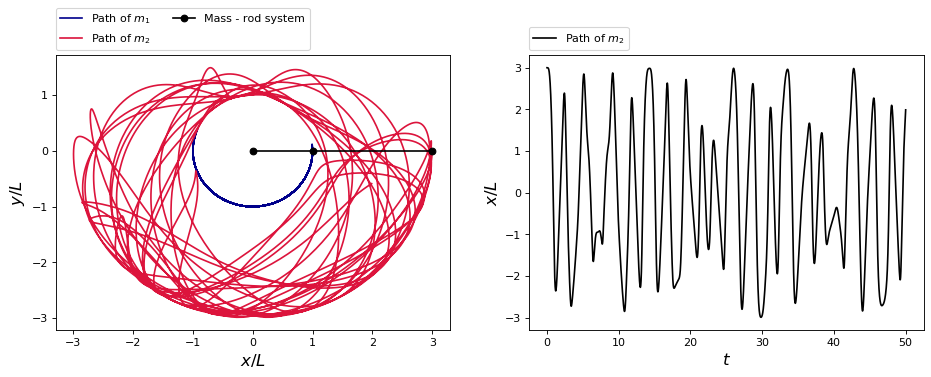

In [73]:
plot_position(x1, y1, x2, y2, theta1, theta2, t)

Plotting the trajectory of the double pendulum, where the mass $M_1$ is represented by the blue trajectory and $M_2$ by the red one. The path of $M_2$ as a function of time shows the that even though the positional trajectory exhibits chaotic behaviour, we can still see a sinusoidal (or combination of sinusoids) present in the plot against time.

### Fourier transform of the x-position of $M_2$

In [74]:
def Fourier_t(x1, y1, x2, y2, theta1, theta2, t):
    plt.figure(figsize=(10,8), dpi=80)

    yf = fftpack.fft(x2)
    freq = fftpack.fftfreq(len(x2),d = dt)
    
    pos_mask = np.where(freq > 0)
    yf_pos = yf[pos_mask]
    freq_pos = freq[pos_mask]
    peak_freq = freq_pos[np.abs(yf_pos).argmax()]
    print(peak_freq, 1 / peak_freq)

    plt.plot(freq_pos,(np.abs(yf_pos)), '-.', c = 'k')
    plt.xlabel('Frequency /s', fontsize = 15)
    plt.ylabel(r'$\theta_2$', fontsize = 15) 
    plt.xlim(-1,10)
    #plt.yscale('log')
    plt.show()

0.4199160167966407 2.3814285714285712


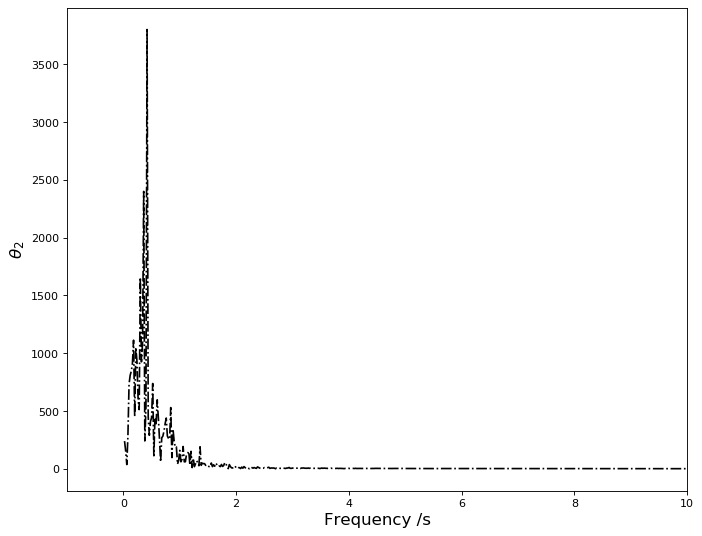

In [75]:
Fourier_t(x1, y1, x2, y2, theta1, theta2, t)

The peak frequency is given by the output, Frequency $\approx 0.4199 s^{-1} $

### Setting our initial values for a non-chaotic system where $2L_1=L_2$ and $m_1 = 3m_2$ but starting at a different angle $\theta_i$, where starting angle for $(\theta_1)=0$ and $(\theta_2) = \frac{\pi}{4}$

In [76]:
L1, L2 = 1., 2.
M1, M2 = 3., 1.

z1 = [0, 0, np.pi/4, 0]
tmax, dt = 50, 0.01
t = np.arange(0, tmax+dt, dt)

In [77]:
x = odeint(double_pen_funct, z1, t, args=(L1, L2, M1, M2, g))

theta1, w1, theta2, w2 = x[:,0], x[:,1], x[:,2], x[:,3]
x1, y1, x2, y2, vx1, vy1, vx2, vy2 = cartesian_funct(theta1, w1, theta2, w2, L1, L2)

In [78]:
def plot_position(x1, y1, x2, y2, theta1, theta2, t):
    plt.figure(figsize=(14,10), dpi=80)

    # xy-plot
    ax = plt.subplot(2, 2,1, autoscale_on=True)
    
    ax.plot(x1, y1, label=r"Path of $m_1$", c = 'darkblue')
    ax.plot(x2, y2, label=r"Path of $m_2$", c = 'crimson')
    ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], "-o", label="Mass - rod system", c='k')
    plt.ylabel(r"$y/L$", fontsize = 15)
    plt.xlabel(r"$x/L$", fontsize = 15)
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, borderaxespad=0.)
    
    ax = plt.subplot(2, 2, 2)
    ax.plot(t, x2, label=r"Path of $m_2$", c = 'k')
    plt.ylabel(r"$x/L$", fontsize = 15)
    plt.xlabel(r"$t$", fontsize = 15)
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, borderaxespad=0.)

    plt.show()

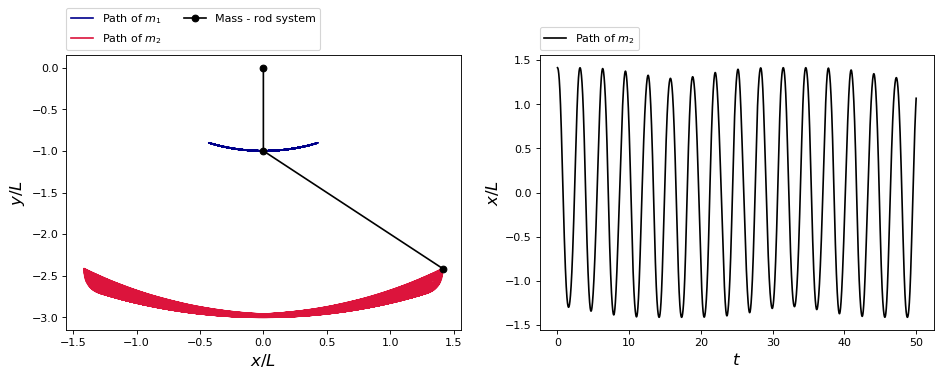

In [79]:
plot_position(x1, y1, x2, y2, theta1, theta2, t)

The initial conditions for the non-chaotic system is set such that the double pendulum exhibits a simple pendulum (with a small angle) motion. We see this periodic motion in the position versus time plot for the path of $M_2$. There is a clear sinusoidal motion for mass $M_2$ since we set our conditions such that we get a simple pendulum (one pendulum) motion.

In [80]:
def Fourier_t(x1, y1, x2, y2, theta1, theta2, t):
    plt.figure(figsize=(10,8), dpi=80)

    yf = fftpack.fft(x2)
    freq = fftpack.fftfreq(len(x2),d = dt)
    
    pos_mask = np.where(freq > 0)
    yf_pos = yf[pos_mask]
    freq_pos = freq[pos_mask]
    peak_freq = freq_pos[np.abs(yf_pos).argmax()]
    print(peak_freq, 1 / peak_freq)

    plt.plot(freq_pos,(np.abs(yf_pos)), '-.', c = 'k')
    plt.xlabel('Frequency /s', fontsize = 15)
    plt.ylabel(r'$\theta_2$', fontsize = 15) 
    plt.xlim(-1,10)
    #plt.yscale('log')
    plt.show()

0.31993601279744055 3.1256249999999994


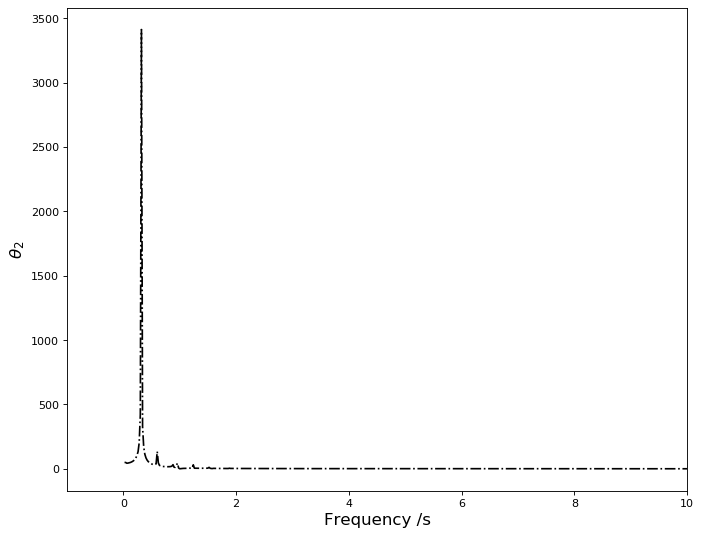

In [81]:
Fourier_t(x1, y1, x2, y2, theta1, theta2, t)

The peak frequency is given by the output, $f_1  \approx 0.3199 s^{-1} $ however it also has a smaller peak at $f_2 \approx 0.684 s^{-1}$

## References 
[1] Tjemsland, Jonas, et al. “Notebook on Nbviewer.” Jupyter Notebook Viewer, 15 Apr. 2018, nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/double_pendulum.ipynb#apndx.

### Adding in the animation for the double pendulum for fun

In [82]:
def create_animation(filename, x1, y1, x2, y2, tmax, L1, L2):
    fig = plt.figure(figsize=(4, 4), dpi=60)
    L = 1.1*(L1 + L2)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-L, L), ylim=(-L, L))

    tail1, = ax.plot([],[],'r') # Tail for m2
    line, = ax.plot([], [], '-o', lw=2, c="k")
    time_template = r'$t = %.1fs$'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    ax.set_aspect('equal')
    ax.axis('off')

    FPS = 15
    framesNum = int(FPS*tmax)
    frames = np.floor(np.linspace(0, len(x1) - 1, framesNum)).astype(np.int)

    def init():
        line.set_data([], [])
        tail1.set_data([], [])
        time_text.set_text('')
        return line, time_text

    def animate(i):
        line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
        tail1.set_data(x2[:i], y2[:i])
        time_text.set_text(time_template % (i*dt))
        return line, time_text, tail1

    anim = animation.FuncAnimation(fig, animate, frames=frames)

    anim.save(filename + '.gif', writer='imagemagick', fps=FPS)
    plt.close(anim._fig)

    with open(filename + '.gif','rb') as file:
        display(Image(file.read()))

In [83]:
#create_animation("double_pendulum", x1, y1, x2, y2, tmax, L1, L2)